In [1]:
from helpers import *
from tqdm import notebook

In [2]:
def runsims(alpha = 0.95, num_sim=30, temp = 10, stopK = 0.000001, element="swap"):
    sim = AnnealTVS(df, K = temp, stopK = stopK, alpha = alpha, elementary=element, num_sim = num_sim)
    res = sim.run_sim()
    return res

def plot_solution(solution, df):
    df.plot.scatter("x", "y")
    for i in range(len(solution)-1):
        fro = df.loc[solution[i]]
        to = df.loc[solution[i+1]]
        plt.arrow(fro["x"], fro["y"], to["x"]-fro["x"], to["y"]-fro["y"])
    fro = df.loc[solution[len(solution)-1]]
    to = df.loc[solution[0]]
    plt.arrow(fro["x"], fro["y"], to["x"]-fro["x"], to["y"]-fro["y"])

In [4]:
def get_distance(x1, y1, x2, y2) :
    return np.sqrt((x1-x2)**2 + abs(y1-y2)**2)

def total_distance(solution, df):
    distance = 0
    for i in range(len(solution)-1):
        fro = df.loc[solution[i]]
        to = df.loc[solution[i+1]]
        distance += get_distance(fro["x"], fro["y"], to["x"], to["y"])
     # make it a circle
    fro = df.loc[solution[len(solution)-1]]
    to = df.loc[solution[0]]
    distance += get_distance(fro["x"], fro["y"], to["x"], to["y"])
    return distance

In [4]:
df = pd.read_csv("data/eil51.tsp.txt", skiprows=6, names=["id", "x", "y"], header=None, delimiter = ' ', index_col=0).drop("EOF")

In [11]:
sim = AnnealTVS(df, K = 10, num_sim=1,num_searches = 200,stopK = .1, alpha = 0.97, beta = 0.2, gamma = 0.5,
                elementary="2opt", verbose=True, alternate=True, secondary="insert")

In [12]:
sim.total_distance()

507.99644160774494

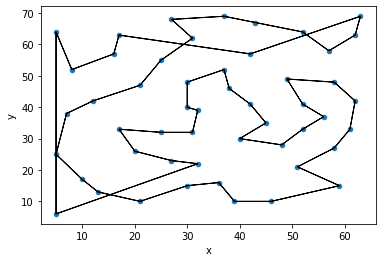

In [13]:
sim.plot_solution()

In [ ]:
res = sim.run_sim()

temperature: 10
times lowered: 13
times raised:22
temperature: 9.7
times lowered: 31
times raised:30
temperature: 9.408999999999999
times lowered: 31
times raised:31
temperature: 9.126729999999998
times lowered: 33
times raised:25
temperature: 8.852928099999998
times lowered: 28
times raised:28
temperature: 8.587340256999997
times lowered: 38
times raised:30
temperature: 8.329720049289998
times lowered: 22
times raised:30
temperature: 8.079828447811298
times lowered: 26
times raised:34
temperature: 7.837433594376959
times lowered: 35
times raised:22
temperature: 7.60231058654565
times lowered: 26
times raised:22
temperature: 7.374241268949281
times lowered: 18
times raised:21
temperature: 7.153014030880803
times lowered: 17
times raised:17
temperature: 6.938423609954378
times lowered: 23
times raised:22
temperature: 6.7302709016557465
times lowered: 18
times raised:22
temperature: 6.528362774606074
times lowered: 16
times raised:12
temperature: 6.332511891367892
times lowered: 23
times

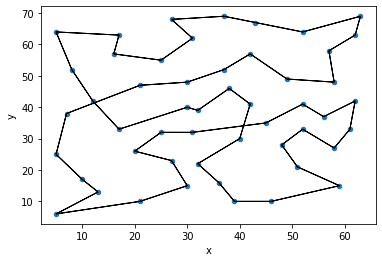

In [13]:
sim.plot_solution()

In [14]:
sim.total_distance()

469.0880923588194

In [ ]:
num_sims = 8
results_sims= Parallel(n_jobs=8)(delayed(runsims)(num_sim = 10, temp=i, stopK=.1, element="2opt")
                                      for i in range(num_sims))

In [ ]:
total_distance(results_sims[0][0], df)

In [ ]:
for i in range(len(results_sims)):
    for j in range(len(results_sims[i])):
        print(total_distance(results_sims[i][j], df))

In [ ]:
num_sims = 8
results_sims= Parallel(n_jobs=8)(delayed(runsims)(num_sim = 10, temp=i*10, stopK=.1, alpha = 0.9, element="insert")
                                      for i in range(num_sims))

In [ ]:
for i in range(len(results_sims)):
    for j in range(len(results_sims[i])):
        print(total_distance(results_sims[i][j], df))

In [ ]:
num_sims = 8
results_sims= Parallel(n_jobs=8)(delayed(runsims)(num_sim = 10, temp=i*10, stopK=.1, alpha = 0.9, element="swap")
                                      for i in range(num_sims))

In [ ]:
for i in range(len(results_sims)):
    for j in range(len(results_sims[i])):
        print(total_distance(results_sims[i][j], df))